In [6]:
from mysql_manager import MySQLManager
from scibert import SciBERT
import numpy as np
import pandas as pd
from scipy import spatial
import pickle
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg  import FigureCanvasAgg as FigureCanvas
import seaborn as sns
import io

In [4]:
mysql = MySQLManager()
data_2018 = mysql.select("2018")
data_2019 = mysql.select("2019")
data_2020 = mysql.select("2020")
data_2021 = mysql.select("2021")


In [5]:
for item_2018 in data_2018:
    item_2018["vector"] = pickle.loads(item_2018["vector"])
    print(item_2018)

for item_2019 in data_2019:
    item_2019["vector"] = pickle.loads(item_2019["vector"])
    
for item_2020 in data_2020:
    item_2020["vector"] = pickle.loads(item_2020["vector"])

for item_2021 in data_2021:
    item_2021["vector"] = pickle.loads(item_2021["vector"])
# print (data_2021);

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
def find(data, vector):
    df_lst = []
    for item in data:
        sim = similarity(vector, item["vector"])
        df_lst.append((item["author"], sim))
    df = pd.DataFrame(df_lst, columns=["author", "similarity"])
    df_agg = df.groupby(by=["author"]).similarity.agg(["mean", "std","var"])
    df_agg.reset_index(inplace=True)
    df_agg.fillna(0, inplace=True)
    df_sorted = df_agg.sort_values(by=["mean", "std"], ascending=[False, True])
    return df_sorted.to_dict("records")

In [5]:
def similarity(a, b):
    return 1 - spatial.distance.cosine(a, b)

In [6]:
scibert = SciBERT()
print("Enter 'q' to quit.")

Loading SciBERT model


Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Enter 'q' to quit.


In [7]:
query = input("Enter your query: ")

Enter your query: Chemist, Quality Assurance


In [8]:
vector = scibert.vectorize(query)

In [39]:
res_2018 = pd.DataFrame(find(data_2018, vector)) 
res_2019 = pd.DataFrame(find(data_2019, vector))
res_2020 = pd.DataFrame(find(data_2020, vector))
res_2021 = pd.DataFrame(find(data_2021, vector))

In [40]:
res_2018.rename(columns = {"mean":"mean_2018","var":"var_2018"}, inplace = True)
res_2018.drop(['std'], axis = 1, inplace = True)
res_2018.head(3)

,author,mean_2018,var_2018
0,"Idrus, Mohd Rushdi",0.67608,0.0
1,"Kasiran, Mohd Khairuddin",0.67608,0.0
2,"Razak, Rafidah Abd",0.67608,0.0


In [41]:
res_2019.rename(columns = {"author":"author_2019", "mean":"mean_2019","var":"var_2019"}, inplace = True)
res_2019.drop(['std'], axis = 1, inplace = True)
res_2019.head(3)

,author_2019,mean_2019,var_2019
0,"Abdullah, Nasuha Lee",0.702404,0.0
1,"Abu Bakar, Muhamad Shahbani",0.677253,0.0
2,"Saad, Sharhida Zawani",0.677253,0.0


In [42]:
# merge datasets
df_combined_v1 = res_2018.merge(res_2019, left_on='author', right_on='author_2019', how='inner')

In [43]:
res_2020.rename(columns = {"author":"author_2020", "mean":"mean_2020","var":"var_2020"}, inplace = True)
res_2020.drop(['std'], axis = 1, inplace = True)
res_2020.head(3)

,author_2020,mean_2020,var_2020
0,"Md Siraj, Maheyzah",0.690790,0.0
1,"Kadir, Rashidah",0.667057,0.0
2,"Zahilah, Raja",0.667057,0.0


In [44]:
df_combined_v2 = df_combined_v1.merge(res_2020, left_on='author', right_on='author_2020', how='inner')

In [45]:
res_2021.rename(columns = {"author":"author_2021", "mean":"mean_2021","var":"var_2021"}, inplace = True)
res_2021.drop(['std'], axis = 1, inplace = True)
res_2021.head(3)

,author_2021,mean_2021,var_2021
0,"Arshad, Marina",0.668910,0.000000
1,"Zahilah, Raja",0.664119,0.000106
2,"Bin Othman, Mohd Khalit",0.660941,0.000751


In [46]:
df_combined = df_combined_v2.merge(res_2021, left_on='author', right_on='author_2021', how='inner')

In [47]:
# view to check merge
df_combined.head(3)

,author,mean_2018,var_2018,author_2019,mean_2019,var_2019,author_2020,mean_2020,var_2020,author_2021,mean_2021,var_2021
0,"Ruhaiyem, Nur Intan Raihana",0.652072,0.000000,"Ruhaiyem, Nur Intan Raihana",0.593962,0.002093,"Ruhaiyem, Nur Intan Raihana",0.666212,0.000874,"Ruhaiyem, Nur Intan Raihana",0.628371,0.000693
1,"Binti Mohd Yasin, Norizan",0.652038,0.000000,"Binti Mohd Yasin, Norizan",0.650419,0.002373,"Binti Mohd Yasin, Norizan",0.534434,0.000000,"Binti Mohd Yasin, Norizan",0.521620,0.000000
2,"Husin, Mohd Heikal",0.650664,0.000631,"Husin, Mohd Heikal",0.629880,0.001090,"Husin, Mohd Heikal",0.567764,0.000770,"Husin, Mohd Heikal",0.598194,0.001584


In [48]:
df_combined.drop(['author_2019','author_2020','author_2021'], axis = 1, inplace = True)

In [49]:
df_combined.head()

,author,mean_2018,var_2018,mean_2019,var_2019,mean_2020,var_2020,mean_2021,var_2021
0,"Ruhaiyem, Nur Intan Raihana",0.652072,0.000000,0.593962,0.002093,0.666212,0.000874,0.628371,0.000693
1,"Binti Mohd Yasin, Norizan",0.652038,0.000000,0.650419,0.002373,0.534434,0.000000,0.521620,0.000000
2,"Husin, Mohd Heikal",0.650664,0.000631,0.629880,0.001090,0.567764,0.000770,0.598194,0.001584
3,"Omar, Mohd Adib",0.650307,0.000000,0.570060,0.000000,0.609767,0.002902,0.612225,0.000167
4,"Norman, Azah Anir",0.642114,0.002107,0.617619,0.000475,0.579375,0.001874,0.601238,0.002200


In [50]:
model_mean = df_combined.groupby('author', sort = False).mean()[['mean_2018', 'mean_2019','mean_2020','mean_2021']]

In [51]:
model_mean.head()

,mean_2018,mean_2019,mean_2020,mean_2021
author,,,,
"Ruhaiyem, Nur Intan Raihana",0.652072,0.593962,0.666212,0.628371
"Binti Mohd Yasin, Norizan",0.652038,0.650419,0.534434,0.521620
"Husin, Mohd Heikal",0.650664,0.629880,0.567764,0.598194
"Omar, Mohd Adib",0.650307,0.570060,0.609767,0.612225
"Norman, Azah Anir",0.642114,0.617619,0.579375,0.601238


In [52]:
model_var = df_combined.groupby('author', sort = False).mean()[['var_2018', 'var_2019','var_2020','var_2021']]

In [53]:
model_var.head()

,var_2018,var_2019,var_2020,var_2021
author,,,,
"Ruhaiyem, Nur Intan Raihana",0.000000,0.002093,0.000874,0.000693
"Binti Mohd Yasin, Norizan",0.000000,0.002373,0.000000,0.000000
"Husin, Mohd Heikal",0.000631,0.001090,0.000770,0.001584
"Omar, Mohd Adib",0.000000,0.000000,0.002902,0.000167
"Norman, Azah Anir",0.002107,0.000475,0.001874,0.002200


In [54]:
x = model_var.query('author == "Ku-Mahamud, Ku Ruhana"')
variance = x.iloc[0].values.mean()
print(variance)

0.0014074833257523563


In [55]:
y = model_mean.query('author == "Ku-Mahamud, Ku Ruhana"')
mean = model_mean.iloc[0].values.mean()
print(mean)

0.6351543590426445


In [120]:
def dy_line_plot(author, heights):
    fig, ax = plt.subplots( figsize = (5,5))
    ax = sns.set_style(style = "whitegrid")
    labels = ['2018','2019','2020','2021'] # this is the years
    # plt.plot(labels,heights)
    plt.title(author.title());
    sns.lineplot(x = labels, y =heights)
    canvas = FigureCanvas(fig)
    img = io.BytesIO()
    fig.savefig(img)
    img.seek(0);

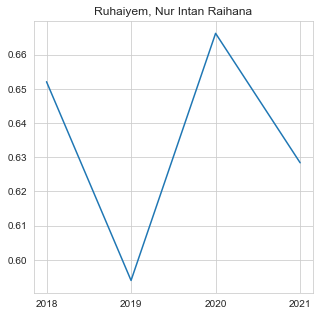

In [121]:
dy_line_plot(model_mean.index[0], model_mean.iloc[0].values)

In [108]:
 model_mean.iloc[0]

mean_2018    0.652072
mean_2019    0.593962
mean_2020    0.666212
mean_2021    0.628371
Name: Ruhaiyem, Nur Intan Raihana, dtype: float64

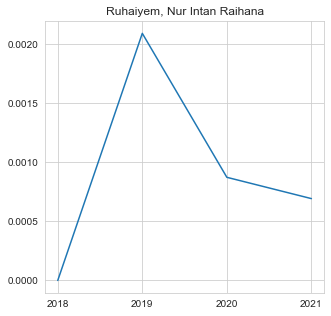

In [109]:
dy_line_plot(model_var.index[0], model_var.iloc[0].values)

In [110]:
model_var.iloc[0]

var_2018    0.000000
var_2019    0.002093
var_2020    0.000874
var_2021    0.000693
Name: Ruhaiyem, Nur Intan Raihana, dtype: float64

In [111]:
index = 1

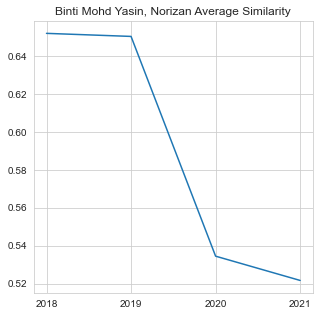

In [112]:
dy_line_plot(model_mean.index[index]+ " Average Similarity", model_mean.iloc[index].values)

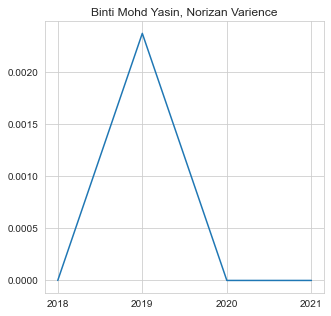

In [113]:
dy_line_plot(model_var.index[index] +" Varience", model_var.iloc[index].values)